In [3]:
import pandas as pd
import os
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("ziya07/student-engagement-dataset-using-eeg")
print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Load the file (note: the file name is assumed to be 'sstudent_engagement_dataset.csv')
df = pd.read_csv(os.path.join(dataset_path, "sstudent_engagement_dataset.csv"))

# Display the first few rows
df.head()


Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/student-engagement-dataset-using-eeg/versions/2
Files in dataset: ['sstudent_engagement_dataset.csv', 'Images']


,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level,Engagement_Label
0,1,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,Text,Easy,0
1,1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,Video,Hard,1
2,1,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,Video,Hard,0
3,1,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,Interactive,Easy,2
4,1,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium,2


In [4]:
# Display column names and data types
df.info()

# Show summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             3000 non-null   int64  
 1   Delta_PSD              3000 non-null   float64
 2   Theta_PSD              3000 non-null   float64
 3   Alpha_PSD              3000 non-null   float64
 4   Beta_PSD               3000 non-null   float64
 5   Gamma_PSD              3000 non-null   float64
 6   Pupil_Dilation         3000 non-null   float64
 7   Blink_Rate             3000 non-null   int64  
 8   Fixation_Duration      3000 non-null   int64  
 9   Saccade_Velocity       3000 non-null   float64
 10  Learning_Content_Type  3000 non-null   object 
 11  Difficulty_Level       3000 non-null   object 
 12  Engagement_Label       3000 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 304.8+ KB


,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Engagement_Label
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,150.500000,1.472100,1.519586,1.512937,1.488765,1.491715,2.002529,19.485333,497.171667,172.302654,1.011333
std,86.616497,0.579312,0.577530,0.574197,0.583241,0.581156,0.577870,5.761208,173.530600,71.840394,0.782779
min,1.000000,0.501110,0.500661,0.500403,0.500845,0.500130,1.000118,10.000000,200.000000,50.013380,0.000000
25%,75.750000,0.967717,1.030661,1.016304,0.970646,0.995430,1.508860,14.000000,349.000000,111.120702,0.000000
50%,150.500000,1.469271,1.530436,1.521254,1.491592,1.482385,2.001384,19.000000,495.500000,171.100711,1.000000
75%,225.250000,1.959954,2.026343,2.012065,1.985428,2.001737,2.503346,24.000000,646.000000,234.994256,2.000000
max,300.000000,2.499895,2.499924,2.499533,2.499097,2.498023,2.999979,29.000000,799.000000,299.865116,2.000000


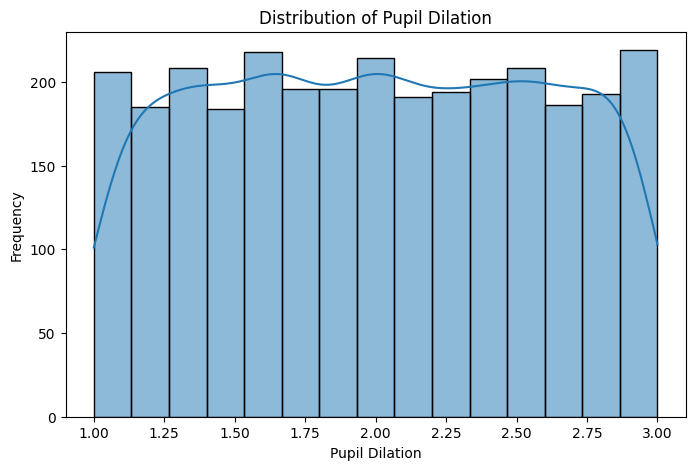

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["Pupil_Dilation"], kde=True)  # Example column for visualization
plt.title("Distribution of Pupil Dilation")
plt.xlabel("Pupil Dilation")
plt.ylabel("Frequency")
plt.show()


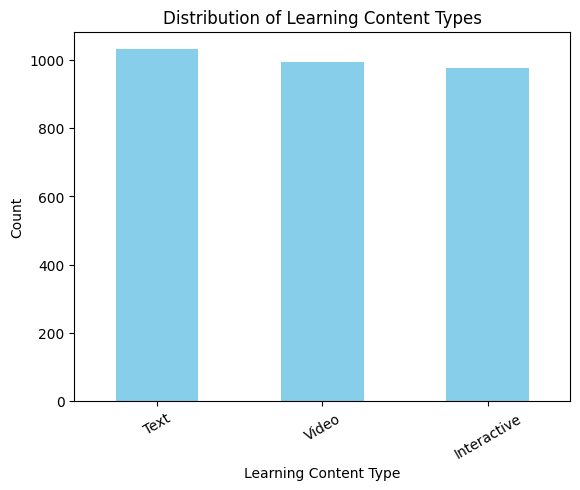

In [8]:
df["Learning_Content_Type"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Learning Content Types")
plt.xlabel("Learning Content Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


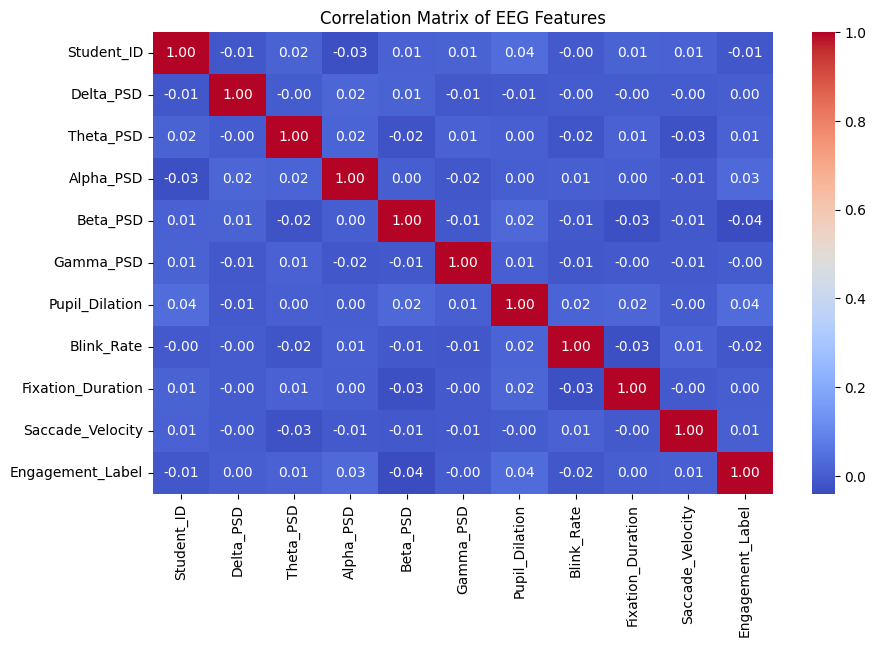

In [9]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of EEG Features")
plt.show()


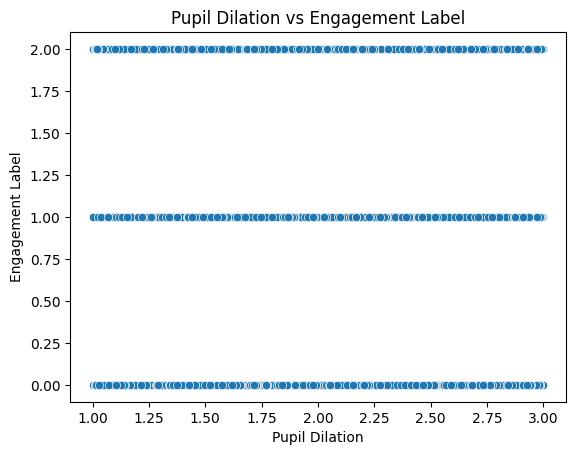

In [10]:
sns.scatterplot(x=df["Pupil_Dilation"], y=df["Engagement_Label"])
plt.title("Pupil Dilation vs Engagement Label")
plt.xlabel("Pupil Dilation")
plt.ylabel("Engagement Label")
plt.show()


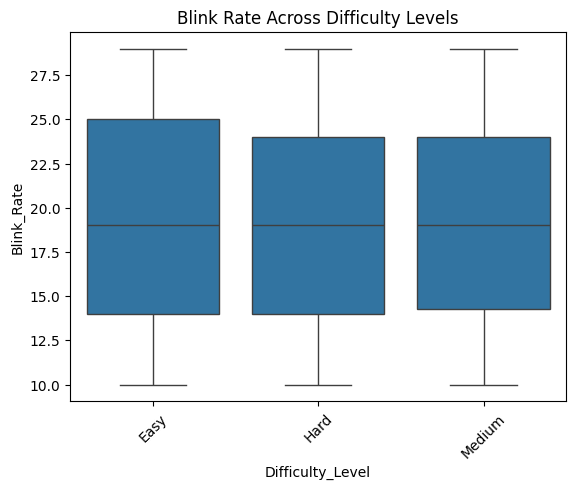

In [11]:
sns.boxplot(x="Difficulty_Level", y="Blink_Rate", data=df)
plt.title("Blink Rate Across Difficulty Levels")
plt.xticks(rotation=45)
plt.show()
